In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import itertools

from config import Config

In [22]:
config = Config()
df_path = f"{config.EXP_PATH}/results.csv"
df = pd.read_csv(df_path)

df['name']  = df['src'].str.lower() + "_" + df['tgt'].str.lower()
df['is_id'] = (df['src'] + "1" == df['tgt'])

df.head()

,corpus_length,src,tgt,bleu,chrF2,num_steps,name,is_id
0,1000,SVO,SOV,7.9,44.3,1716,svo_sov,False
1,1000,SVO,VSO,14.0,49.3,1816,svo_vso,False
2,1000,SVO,VOS,9.4,48.0,1656,svo_vos,False
3,1000,SVO,OSV,0.0,4.5,252,svo_osv,False
4,1000,SVO,OVS,0.0,4.8,272,svo_ovs,False


In [23]:
name_df = df.groupby('name').apply(lambda x : x)
name_df

corpus_length  src   tgt  bleu  chrF2  num_steps      name  \
name                                                                       
osv_osv1 19            1000  OSV  OSV1   0.0    5.1        204  osv_osv1   
         40            2000  OSV  OSV1  16.4   53.9       2640  osv_osv1   
         61            4000  OSV  OSV1  28.7   62.5       4994  osv_osv1   
         82            8000  OSV  OSV1  36.5   65.8       5060  osv_osv1   
         103          16000  OSV  OSV1  44.4   70.4      10374  osv_osv1   
...                     ...  ...   ...   ...    ...        ...       ...   
vso_vso1 38            2000  VSO  VSO1  25.9   58.8       2262  vso_vso1   
         59            4000  VSO  VSO1   6.8   44.8        979  vso_vso1   
         80            8000  VSO  VSO1  44.1   69.0       6825  vso_vso1   
         101          16000  VSO  VSO1  48.7   72.4      12207  vso_vso1   
         122          32000  VSO  VSO1  46.2   71.2      18954  vso_vso1   

              is_id  
name                 
osv_osv1 19    True  
         40    True  
         61    True  
         82    True  
         103   True  
...             ...  
vso_vso1 38    True  
         59    True  
         80    True  
         101   True  
         122   True  

[127 rows x 8 columns]

In [25]:
def plot_scores(df=df, score='bleu'):
    # group by name then find all corp_len, score pairs
    grouped = df.groupby('name').apply(lambda x: list(zip(x['corpus_length'], x[score])))
    data = grouped.to_dict()

    plt.figure(figsize=(12,8))

    # Defining a list of distinct colors
    colors = ['#00BFFF', '#228B22', '#FF6347', '#7851A9', '#FFA500', '#008080', '#708090']
    color_cycle = itertools.cycle(colors)

    # Defining different line markers
    markers = ['o', 's', '^', 'x', '*', '+', 'd']
    marker_cycle = itertools.cycle(markers)

    handles, labels = [], []

    for name, points in data.items():
        lengths, scores = zip(*points)
        color = next(color_cycle)
        marker = next(marker_cycle)
        line, = plt.plot(lengths, scores, label=name, color=color, marker=marker, linestyle='-')
        handles.append(line)
        labels.append((name, max(scores)))

    labels, handles = zip(*sorted(zip(labels, handles), key=lambda x: x[0][1], reverse=True))
    labels = [label[0] for label in labels]

    plt.legend(handles, labels)

    name = "BLEU" if score == 'bleu' else 'chrF2'
    plt.title(f'{name} Scores vs. Corpus Lengths')
    plt.xlabel("Corpus Size")
    plt.ylabel(f"{name} Score")

    plt.grid(True)
    plt.show()

    #plot_path = f"{config.exp_path}/{name}.jpg"
    #plt.savefig(plot_path)

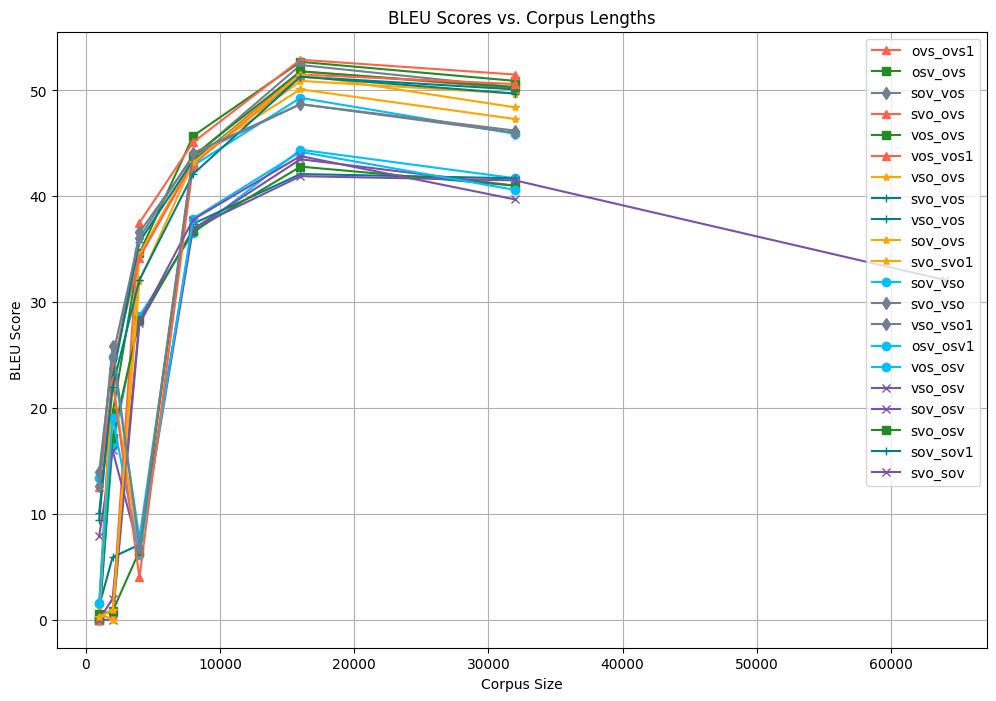

In [26]:
plot_scores()

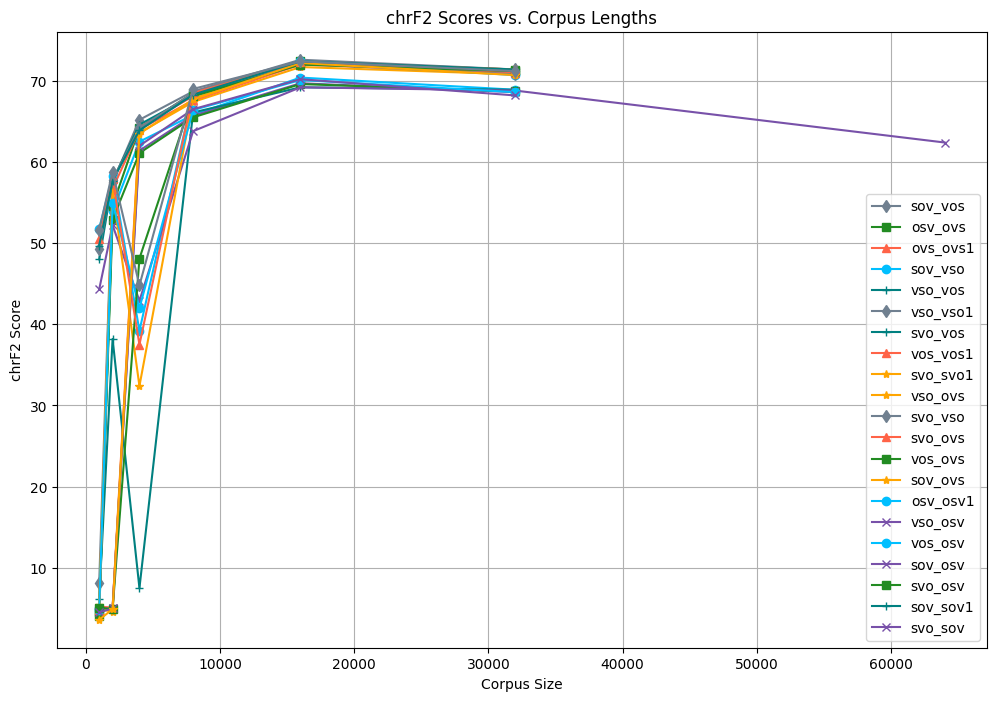

In [27]:
plot_scores(score='chrF2')